In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [3]:
#import csv file
csv_path = Path("Resources/gun_deaths.csv")

#read data into dataframe
df = pd.read_csv(csv_path)

df.head()

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED


In [5]:
#drop null values from dataframe
new_df = df.dropna(how='any', inplace=False)

In [4]:
#delete police column
del new_df['police']

In [5]:
new_df['month'].value_counts()

month
7     8737
8     8512
5     8420
6     8418
9     8299
4     8207
12    8182
10    8181
3     8078
1     8056
11    8025
2     6900
Name: count, dtype: int64

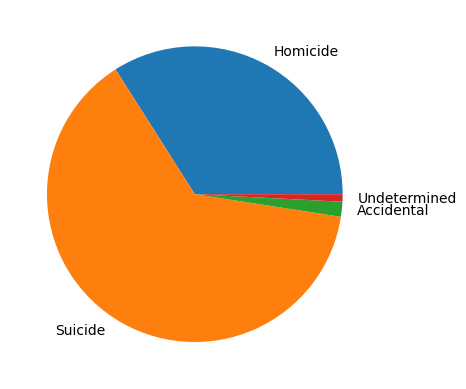

In [6]:
#group by year and intent to track suicides compared to homicides
intent_df = new_df.groupby(['intent'])['intent']

#show the breakdown of numbers
intent = intent_df.value_counts()
intent
labels1 = ["Homicide","Suicide","Accidental","Undetermined"]
sizes = [intent["Homicide"],intent["Suicide"],intent["Accidental"],intent["Undetermined"]]
piechart = plt.pie(sizes, labels=labels1)
piechart
plt.savefig("Output/intentpie.png")

          count
year sex       
2012 M    27974
     F     4641
2013 M    27976
     F     4754
2014 M    27885
     F     4785
4785


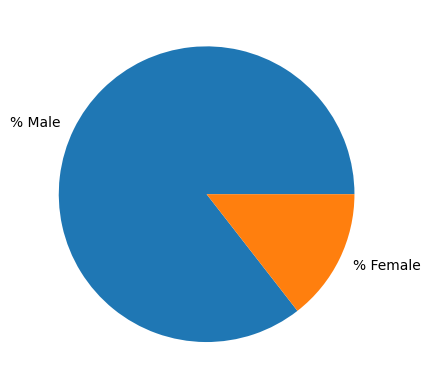

In [7]:
#What percent of gun deaths are males vs females
sex_df = new_df.groupby(['year'])['sex']
sexyear_df = pd.DataFrame(sex_df.value_counts())
print(sexyear_df)
#2012
male2012 = sexyear_df.loc[2012,'M']['count']
female2012 = sexyear_df.loc[2012,'F']['count']
#2013
male2013 = sexyear_df.loc[2013,'M']['count']
female2013 = sexyear_df.loc[2013,'F']['count']
#2014
male2014 = sexyear_df.loc[2014,'M']['count']
female2014 = sexyear_df.loc[(2014,'F')]['count']
print(female2014)
#percent for each year
total2012= male2012 + female2012
total2013=male2013 + female2013
total2014=male2014 + female2014
percentm2012 = round((male2012/total2012)*100,2)
percentf2012 = round((female2012/total2012)*100,2)
percentm2013 = round((male2013/total2013)*100,2)
percentf2013 = round((female2013/total2013)*100,2)
percentm2014 = round((male2014/total2014)*100,2)
percentf2014 = round((female2014/total2014)*100,2)
sex_deaths = pd.DataFrame({"% Male":[percentm2012,percentm2013, percentm2014] , "% Female":[percentf2012,percentf2013, percentf2014]})
sex_deaths
#average percent pie chart 
avgmale= round((percentm2012+percentm2013+percentm2014)/3,2)
avgfemale=round((percentf2012+percentf2013+percentf2014)/3,2)
sizes=[avgmale,avgfemale]
labels = ["% Male","% Female"]
plt.pie(sizes,labels= labels)
plt.savefig("Output/malefemale.png")

In [8]:
#Which education level is most likely to die from a gun
edu_df = new_df.groupby(['year'])['education']
edu_df = pd.DataFrame(edu_df.value_counts())
edu_df

count
year education          
2012 HS/GED        13979
     Less than HS   7394
     Some college   7090
     BA+            4152
2013 HS/GED        14157
     Some college   7155
     Less than HS   7035
     BA+            4383
2014 HS/GED        14122
     Some college   7185
     Less than HS   7019
     BA+            4344

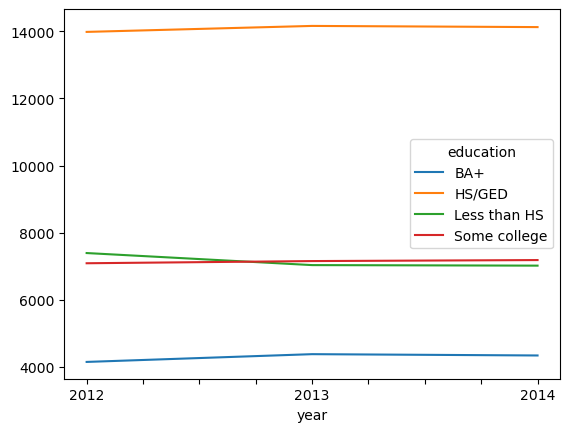

In [9]:
#Create a line graph showing the data for education and year
line_df = edu_df.reset_index().astype({"year":"str"}).pivot(index="year", columns="education", values="count")
line_df.plot()
plt.savefig("Output/education_line.png")

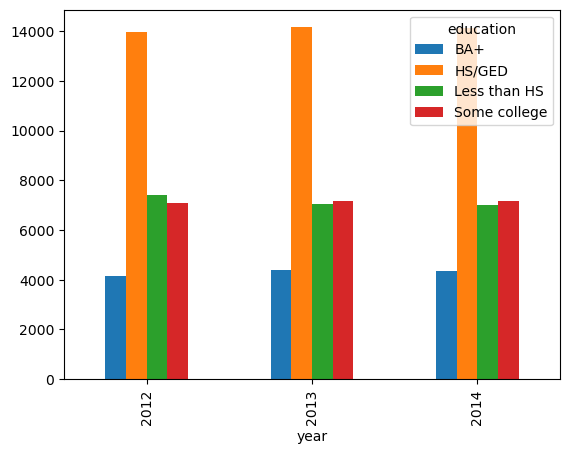

In [10]:
#Create a grouped bar graph that groups the year, education and death count
edu_index = edu_df.reset_index()
edu_index.head()
pivot2 = edu_index.pivot(index= "year",columns='education',values='count')
pivot2.head()
pivot2.plot(kind='bar')
plt.savefig("Output/education_bar.png")

In [11]:
#What race is most likely to die from a gun
race = new_df.groupby(['year'])['race']
race_df = pd.DataFrame(race.value_counts())
race_df

count
year race                                 
2012 White                           21243
     Black                            7734
     Hispanic                         2914
     Asian/Pacific Islander            431
     Native American/Native Alaskan    293
2013 White                           21698
     Black                            7506
     Hispanic                         2813
     Asian/Pacific Islander            426
     Native American/Native Alaskan    287
2014 White                           21657
     Black                            7435
     Hispanic                         2876
     Asian/Pacific Islander            404
     Native American/Native Alaskan    298

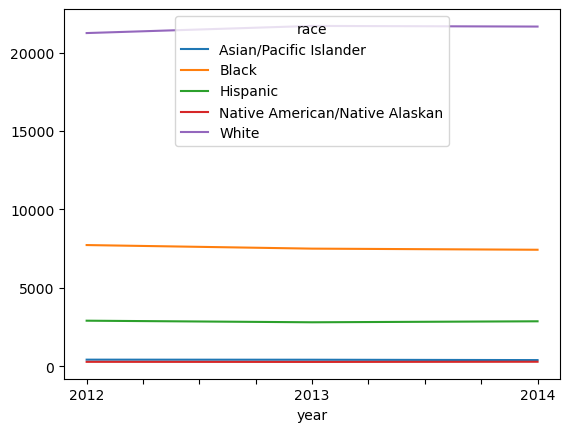

In [12]:
#Create a line graph for the race data set
line_df1 = race_df.reset_index().astype({"year":"str"}).pivot(index="year", columns="race", values="count")
line_df1.plot()
plt.savefig("Output/race_line.png")

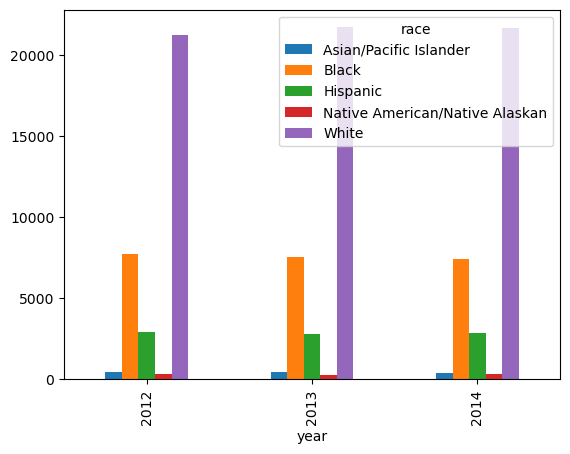

In [13]:
#Create a bar grouped bar graph showing race, year and death count
race_index = race_df.reset_index()
race_index.head()
pivot3 = race_index.pivot(index= "year",columns='race',values='count')
pivot3.head()
pivot3.plot(kind='bar')
plt.savefig("Output/race_bar.png")

60.83
39.17


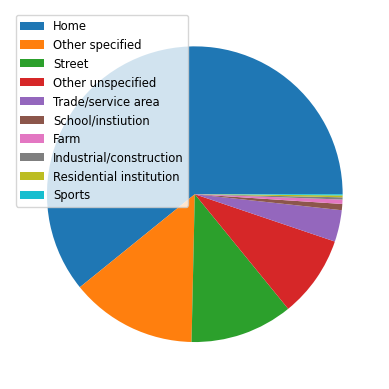

In [14]:
#Are you more likely to die in your own home or the streets Rachel
#make a pie chart
total_deaths = new_df["age"].count()

place_deaths = pd.Series(new_df["place"].value_counts())
at_home_death = place_deaths["Home"]
not_home_death = place_deaths["Other specified"] + place_deaths["Street"] + place_deaths["Other unspecified"] + place_deaths["Trade/service area"] + place_deaths["School/instiution"] + place_deaths["Farm"] + place_deaths["Industrial/construction"] + place_deaths["Residential institution"] + place_deaths["Sports"]
not_home_death
percent_home_death = round((at_home_death /total_deaths)*100,2)
print(percent_home_death)
percent_not_home_death = round((not_home_death /total_deaths)*100,2)
print(percent_not_home_death)

#taking all of the data across years, here is how places compare
labels = ["Home","Other specified","Street","Other unspecified","Trade/service area","School/instiution","Farm","Industrial/construction","Residential institution","Sports"]
sizes = [place_deaths["Home"],place_deaths["Other specified"],place_deaths["Street"],place_deaths["Other unspecified"],place_deaths["Trade/service area"],place_deaths["School/instiution"],place_deaths["Farm"],place_deaths["Industrial/construction"],place_deaths["Residential institution"],place_deaths["Sports"]]
colors =["red","orange","blue","green","yellow","purple","lightskyblue","lightcoral","pink","turquoise"]
piechart = plt.pie(sizes)
plt.legend(labels, loc="upper left",fontsize= "small")
piechart
plt.savefig("Output/placepie1.png")

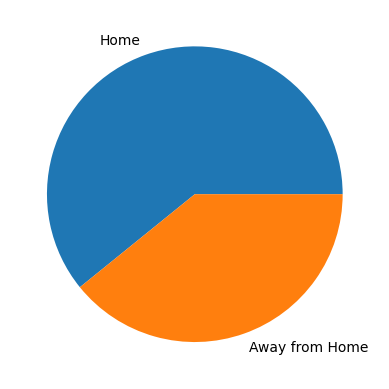

In [15]:
#taking data from all years, home vs not home simplified graph
labels = ["Home","Away from Home"]
sizes = [at_home_death, not_home_death]
piechart2 = plt.pie(sizes, labels=labels)
piechart2
plt.savefig("Output/placepie2.png")

In [16]:
#deaths by place and by year
#total
yeartotaldeaths = new_df.groupby(["year"])["place"]
years_deaths = pd.Series(yeartotaldeaths.value_counts())
years_deaths
#2012
total_deaths_year2012 = years_deaths[2012,"Home"]+ years_deaths[2012,"Other specified"] + years_deaths[2012,"Street"] + years_deaths[2012,"Other unspecified"] + years_deaths[2012,"Trade/service area"] + years_deaths[2012,"School/instiution"] + years_deaths[2012,"Farm"] + years_deaths[2012,"Industrial/construction"] + years_deaths[2012,"Residential institution"] + years_deaths[2012,"Sports"]
at_home_death_year2012 = years_deaths[2012,"Home"]
not_home_death_year2012 = years_deaths[2012,"Other specified"] + years_deaths[2012,"Street"] + years_deaths[2012,"Other unspecified"] + years_deaths[2012,"Trade/service area"] + years_deaths[2012,"School/instiution"] + years_deaths[2012,"Farm"] + years_deaths[2012,"Industrial/construction"] + years_deaths[2012,"Residential institution"] + years_deaths[2012,"Sports"]
percent_home_death_year2012 = round((at_home_death_year2012 /total_deaths_year2012)*100,2)
percent_not_home_death_year2012 = round((not_home_death_year2012 /total_deaths_year2012)*100,2)
#2013
total_deaths_year2013 = years_deaths[2013,"Home"]+ years_deaths[2013,"Other specified"] + years_deaths[2013,"Street"] + years_deaths[2013,"Other unspecified"] + years_deaths[2013,"Trade/service area"] + years_deaths[2013,"School/instiution"] + years_deaths[2013,"Farm"] + years_deaths[2013,"Industrial/construction"] + years_deaths[2013,"Residential institution"] + years_deaths[2013,"Sports"]
at_home_death_year2013 = years_deaths[2013,"Home"]
not_home_death_year2013 = years_deaths[2013,"Other specified"] + years_deaths[2013,"Street"] + years_deaths[2013,"Other unspecified"] + years_deaths[2013,"Trade/service area"] + years_deaths[2013,"School/instiution"] + years_deaths[2013,"Farm"] + years_deaths[2013,"Industrial/construction"] + years_deaths[2013,"Residential institution"] + years_deaths[2013,"Sports"]
percent_home_death_year2013 = round((at_home_death_year2013 /total_deaths_year2013)*100,2)
percent_not_home_death_year2013 = round((not_home_death_year2013 /total_deaths_year2013)*100,2)
#2014
total_deaths_year2014 = years_deaths[2014,"Home"]+ years_deaths[2014,"Other specified"] + years_deaths[2014,"Street"] + years_deaths[2014,"Other unspecified"] + years_deaths[2014,"Trade/service area"] + years_deaths[2014,"School/instiution"] + years_deaths[2014,"Farm"] + years_deaths[2014,"Industrial/construction"] + years_deaths[2014,"Residential institution"] + years_deaths[2014,"Sports"]
at_home_death_year2014 = years_deaths[2014,"Home"]
not_home_death_year2014 = years_deaths[2014,"Other specified"] + years_deaths[2014,"Street"] + years_deaths[2014,"Other unspecified"] + years_deaths[2014,"Trade/service area"] + years_deaths[2014,"School/instiution"] + years_deaths[2014,"Farm"] + years_deaths[2014,"Industrial/construction"] + years_deaths[2014,"Residential institution"] + years_deaths[2014,"Sports"]
percent_home_death_year2014 = round((at_home_death_year2014 /total_deaths_year2014)*100,2)
percent_not_home_death_year2014 = round((not_home_death_year2014 /total_deaths_year2014)*100,2)
#create a summary df 
summary_deaths = pd.DataFrame({"Total deaths":[total_deaths_year2012,total_deaths_year2013,total_deaths_year2014],"Deaths at home":[at_home_death_year2012, at_home_death_year2013, at_home_death_year2014] , "Deaths away from home":[not_home_death_year2012, not_home_death_year2013, not_home_death_year2014],"Percent at home":[percent_home_death_year2012, percent_home_death_year2013, percent_home_death_year2014], "Percent away from home": [percent_not_home_death_year2012, percent_not_home_death_year2013, percent_not_home_death_year2014]})
yearsum = pd.Series([2012, 2013, 2014])
summary_deaths.set_index([yearsum])

,Total deaths,Deaths at home,Deaths away from home,Percent at home,Percent away from home
2012,32615,19440,13175,59.60,40.40
2013,32730,19814,12916,60.54,39.46
2014,32670,20368,12302,62.34,37.66


The above graphs demonstrate that over the years, there is a consistent pattern of around 60% of all total deaths occuring in the home with the remaining 40% being away from home. This is consistent with the statistic that the majority of our deaths are suicides not homicides and suicides are more likely to take place at ones own home (find citation for this )

In [17]:
#What month do the most gun deaths occur Rachel
#grouping death count by month and year 
deaths_by_month = new_df.groupby(["year","month"])
month_count = pd.DataFrame(deaths_by_month["month"].value_counts())
month_count = month_count.reset_index()
month_count.head()


,year,month,count
0,2012,1,2695
1,2012,2,2281
2,2012,3,2674
3,2012,4,2719
4,2012,5,2921


In [18]:
#using pivot to reorient data for graphing 
pivot = month_count.pivot(index='month',columns='year',values='count')
pivot.head()


year,2012,2013,2014
month,,,
1,2695,2778,2583
2,2281,2317,2302
3,2674,2784,2620
4,2719,2717,2771
5,2921,2729,2770


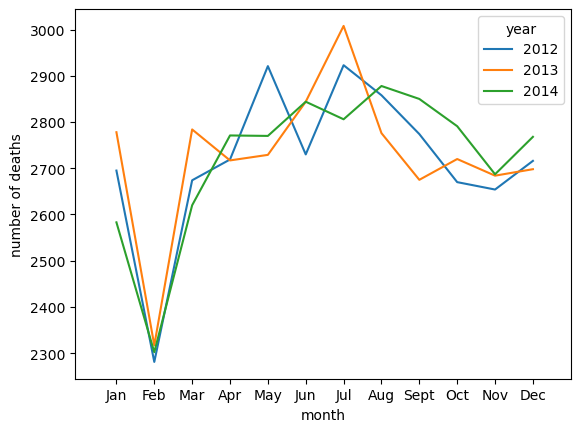

In [19]:
#line graph to show deaths each month for each year
fig1 = pivot.plot()
plt.xlim(-.1,13)
plt.ylabel("number of deaths")
ticks = [1,2,3,4,5,6,7,8,9,10,11,12]
labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
plt.xticks(ticks=ticks,labels=labels)
plt.savefig("Output/monthsline.png")

In [20]:
#bar graph to show monthly average across years 
plt.bar(months,averages)
plt.xlim(-.1,13)
plt.ylabel("number of deaths")
ticks = [1,2,3,4,5,6,7,8,9,10,11,12]
labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
plt.xticks(ticks=ticks,labels=labels)
plt.savefig("Output/monthsbar.png")

NameError: name 'months' is not defined

When analyzing the relationship between month of the year and death count, there appears to be a pattern of increased death count in the months july and august which is consistent with existing research on increased violent crimes in the summer (add citations). When we examine the average death count across years for each month it puts the size of the increase into perspective. While it is notable, the difference is likely not statistically significant 


## What ages are most likely to die by a gun?

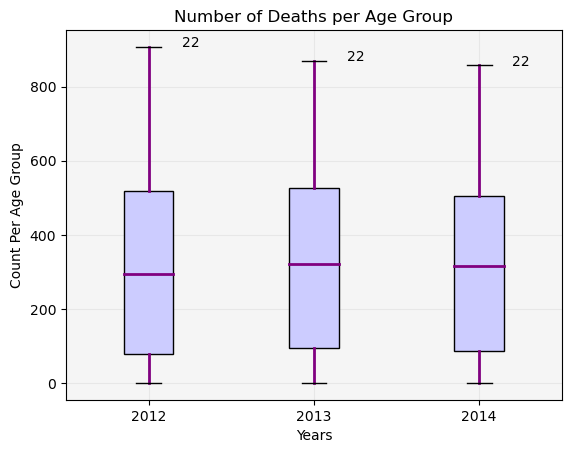

In [26]:
#set default parameters for the background color
plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'#f5f5f5'})

#create a dataframe with age and year
age = pd.DataFrame(new_df[['age','year']])

#save value counts for the age dataframe
age_df = pd.DataFrame(age.value_counts())

#reset the index
age_df.reset_index(inplace=True)

#filter the age_df for the year wanted
yr_2012 = age_df.loc[age_df['year']==2012]
yr_2013 = age_df.loc[age_df['year']==2013]
yr_2014 = age_df.loc[age_df['year']==2014]

#get the count of the age_df and save it as a list
ct_12 = yr_2012['count'].values.tolist() 
ct_13 = yr_2013['count'].values.tolist() 
ct_14 = yr_2014['count'].values.tolist()

#get the corresponding age of the count column
Vcount12 = yr_2012['age'].value_counts().idxmax()
Vcount13 = yr_2013['age'].value_counts().idxmax()
Vcount14 = yr_2014['age'].value_counts().idxmax()

#create a list that will be used for x ticks
years = ["2012","2013","2014"]

#code source below
#https://python-charts.com/distribution/box-plot-matplotlib/ #source for code below

#plot box plot
plt.boxplot([ct_12,ct_13,ct_14] ,labels=years,sym='ro', medianprops = dict(color = "purple",linewidth =2), \
           whiskerprops = dict(color = "purple", linewidth = 2),patch_artist = True, 
           boxprops = dict(facecolor = "#ccccff"))

#chart characteristics
plt.title("Number of Deaths per Age Group")
plt.xlabel('Years')
plt.ylabel('Count Per Age Group')
plt.grid(True,alpha=.2)
plt.text(1.2,yr_2012['count'].max(),f"{Vcount12:g}")
plt.text(2.2,yr_2013['count'].max(),f"{Vcount13:g}")
plt.text(3.2,yr_2014['count'].max(),f"{Vcount14:g}")


#save chart to png file in the output folder
plt.savefig("Output/boxplotbyyear.png")

#### Analysis 
The graph above summarizes the total deaths for each age and is grouped by year.  The ages range
from 0-107.  The specific age that has the highest total deaths each year is age 22.  This is denoted
by the age displayed to the right of each box plot.

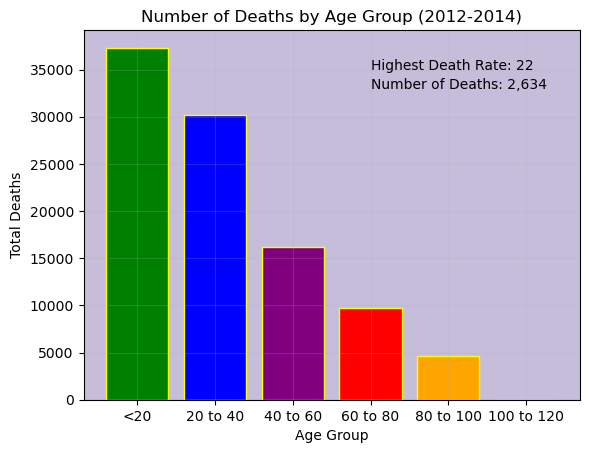

In [6]:
#create a copy of the clean dataframe
copy_df = new_df.copy()

#get the counts by age
vCount = copy_df['age'].value_counts()

#gets the name of the highest value count
top_value = vCount.idxmax()

#get the value associated with the value counts
valuec = copy_df['age'].value_counts().max()

#create bins and labels for the chart
bins=[0,20,40,60,80,100,120]
labels=["<20","20 to 40","40 to 60","60 to 80","80 to 100","100 to 120"]

#create a new column categories from the split of age ranges
copy_df['categories'] = pd.cut(copy_df['age'],bins,labels=labels)

#create a list of y values
y_values = copy_df['categories'].value_counts().tolist()

#create a list of x values
x_values = ["<20","20 to 40","40 to 60","60 to 80","80 to 100","100 to 120"]

#set defaults for background
plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'#c6bddb'})

#these are the colors of the bars
colors = ['green','blue','purple','red','orange']

#plot the bar chart
plt.bar(x_values,y_values,color=colors,edgecolor="yellow")

#chart characteristics
plt.title("Number of Deaths by Age Group (2012-2014)")
plt.xlabel("Age Group")
plt.ylabel("Total Deaths")
plt.grid(alpha=.2)
plt.text(3,35000,f"Highest Death Rate: {top_value:g}")
plt.text(3,33000,f"Number of Deaths: {valuec:,}")

#save chart to png file in the output folder
plt.savefig("Output/barhighestbyage.png")

## Analysis
This chart combines years 2012-2014 into age groups of 20.  The age ranges in the data are from 0-107.
Although there does not appear to be a value for 100-120 there was a total of 5 deaths.
In review of the data it would appear that age and gun deaths have an inverse relationship.

Text(0.5, 1.0, 'Top 10 Deaths by Specific Age')

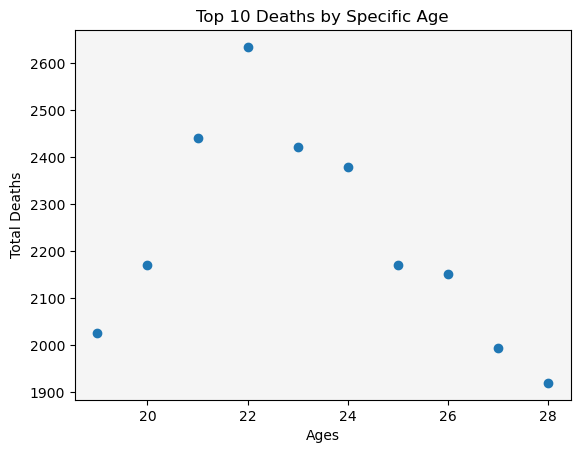

In [7]:
#create a chart that shows the top 10 deaths by specific age

#copy the clean df
copy_df = new_df.copy()

#set defaults for chart background
plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'#f5f5f5'})

#create a dataframe store ages
temp = pd.DataFrame(copy_df['age'].value_counts())

#reset the index of the dataframe to be able to use age as a column
new_temp = temp.reset_index(inplace = False)

#save top 10 ages and counts to lists
top10_age = new_temp['age'].head(10).tolist()
top10_count = new_temp['count'].head(10).tolist()
top10_count

#graph the results
plt.scatter(top10_age,top10_count)
plt.xlabel('Ages')
plt.ylabel("Total Deaths")
plt.title("Top 10 Deaths by Specific Age")

#save chart to png file in the output folder
plt.savefig("Output/top10scatter.png")

## Analysis
This data shows that the top 10 deaths by age are all contained within the age group 20-40 however,
the highest tally per group is the age group of 0-20.  In looking at the data above one would assume
that the top 10 deaths would be in that category however, it means that the deaths are more evenly dispersed among 
other groups.

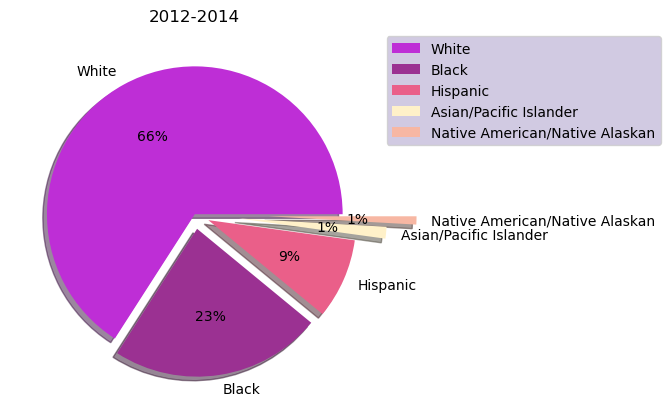

In [23]:
#group demographics into a new dataframe
ages = copy_df[['year','race','age','sex','education']]

#group data by race
ages.groupby(['race'])

#create a dataframe with the counts by race
all_years =pd.DataFrame(ages['race'].value_counts())

#reset index
all_years.reset_index(inplace=True)

#create a list of races from the dataframe value counts
labels = copy_df['race'].value_counts().index.tolist()

#explode pieces of the pie that are hard to see
params_explode = [0, 0.1,0.1,0.3,.5]
wedge_colors =['#be2ed6','#9B3192','#EA5F89','#FFF1C9','#F7B7A3']

#create pie chart
chart1 = plt.pie(all_years['count'],autopct='%.f%%',labels=labels,explode=params_explode,shadow=True, colors=wedge_colors)

#chart characteristics
plt.title("2012-2014")
plt.legend(bbox_to_anchor=(1,1))

#save chart to png file in the output folder
plt.savefig("Output/pieracebyyear.png")

## Analysis
This chart combines all years 2012-2014 to show the number of deaths by race.  Clearly, whites
have the highest gun death rate.  This analysis only looks at race and no other factors.

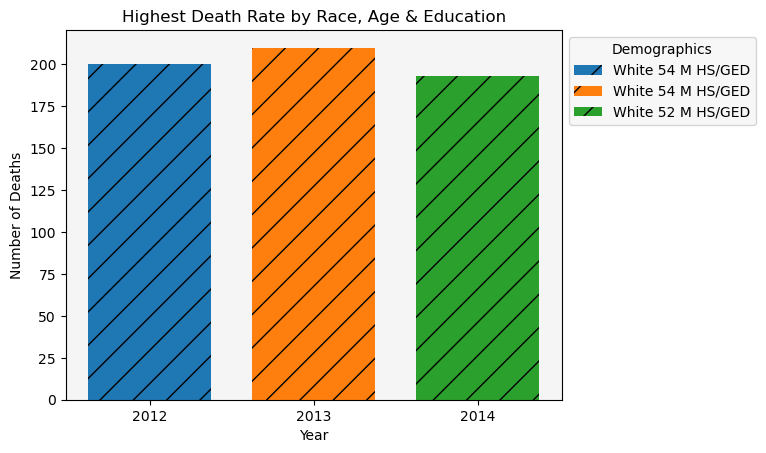

In [24]:
#create a bar chart that shows a specific person most likely to die by a gun

#set defaults for chart background
plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'#f5f5f5'})

#create a dataframe with only columns needed
year_df = copy_df[['year','race','age','sex','education']]

#filter main dataframe by year
age_death_12 = year_df.loc[year_df['year']==2012]
age_death_13 = year_df.loc[year_df['year']==2013]
age_death_14 = year_df.loc[year_df['year']==2014]

#get the highest rate of death by demographic
age_death_12 = pd.DataFrame(age_death_12.value_counts())
age_death_13 = pd.DataFrame(age_death_13.value_counts())
age_death_14 = pd.DataFrame(age_death_14.value_counts())

#get only the top value of the dataframe
demo2012 = age_death_12.iloc[0:1]
demo2013 = age_death_13.iloc[0:1]
demo2014 = age_death_14.iloc[0:1]

#reset all the indices so that all columns can be used
demo2012.reset_index(inplace=True)
demo2013.reset_index(inplace=True)
demo2014.reset_index(inplace=True)

#get the top line of data from the dataframes for each year
year1 = f"{demo2012['race'].max()} {demo2012['age'].max():g} {demo2012['sex'].max()} {demo2012['education'].max()}"
year2 = f"{demo2013['race'].max()} {demo2013['age'].max():g} {demo2013['sex'].max()} {demo2013['education'].max()}"
year3 = f"{demo2014['race'].max()} {demo2014['age'].max():g} {demo2014['sex'].max()} {demo2014['education'].max()}"

#get the count of for the year
new12 = demo2012['count'].max()
new13 = demo2013['count'].max()
new14 = demo2014['count'].max()

#create bar chart
plt.bar(2012,new12, width=0.75, label=year1,hatch="/")
plt.bar(2013,new13, width=0.75, label=year2,hatch="/")
plt.bar(2014,new14, width=0.75, label=year3,hatch="/")

#chart characteristics
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Demographics')
plt.xticks([2012,2013,2014])
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.title("Highest Death Rate by Race, Age & Education")

#save chart to png file in the output folder
plt.savefig("Output/barbydemo.png")

## Analysis
The person most likely to die from a gun during the years of 2012-2014 are white males with a high school
equivalent education.  However, the age spans from 52-54.